In [5]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import os
%matplotlib inline

In [6]:
npath=os.path.abspath(os.pardir)+"\\Data\Raw\Weather.csv"
dataset=pd.read_csv(npath,index_col=0)


#dataset = pd.read_csv('C:\\Users\\agentimis1\\Google Drive\\Collaborations\\01_Current\\Digital_Ag\\Digital_Ag_Class\\01_General\\Notes\\Machine_Learning\\Linear_Regression\\Data\\Weather.csv')

In [7]:
dataset.head(5)

Date Precip  WindGustSpd    MaxTemp    MinTemp   MeanTemp Snowfall  \
STA                                                                             
10001  7/1/1942  1.016          NaN  25.555556  22.222222  23.888889      0.0   
10001  7/2/1942      0          NaN  28.888889  21.666667  25.555556      0.0   
10001  7/3/1942   2.54          NaN  26.111111  22.222222  24.444444      0.0   
10001  7/4/1942   2.54          NaN  26.666667  22.222222  24.444444      0.0   
10001  7/5/1942      0          NaN  26.666667  21.666667  24.444444      0.0   

       YR  MO  DA  PRCP  DR  SPD   MAX   MIN   MEA  SNF  
STA                                                      
10001  42   7   1  0.04 NaN  NaN  78.0  72.0  75.0  0.0  
10001  42   7   2  0.00 NaN  NaN  84.0  71.0  78.0  0.0  
10001  42   7   3  0.10 NaN  NaN  79.0  72.0  76.0  0.0  
10001  42   7   4  0.10 NaN  NaN  80.0  72.0  76.0  0.0  
10001  42   7   5  0.00 NaN  NaN  80.0  71.0  76.0  0.0

In [8]:
dataset.shape

(119040, 17)

In [9]:
dataset.describe()

WindGustSpd        MaxTemp        MinTemp       MeanTemp  \
count   532.000000  119040.000000  119040.000000  119040.000000   
mean     37.774534      27.045111      17.789511      22.411631   
std      10.297808       8.717817       8.334572       8.297982   
min      18.520000     -33.333333     -38.333333     -35.555556   
25%      29.632000      25.555556      15.000000      20.555556   
50%      37.040000      29.444444      21.111111      25.555556   
75%      43.059000      31.666667      23.333333      27.222222   
max      75.932000      50.000000      34.444444      40.000000   

                  YR             MO             DA           PRCP          DR  \
count  119040.000000  119040.000000  119040.000000  117108.000000  533.000000   
mean       43.805284       6.726016      15.797530       0.129088   26.998124   
std         1.136718       3.425561       8.794541       0.428416   15.221732   
min        40.000000       1.000000       1.000000       0.000000    2.000000   
25%        43.000000       4.000000       8.000000       0.000000   11.000000   
50%        44.000000       7.000000      16.000000       0.000000   32.000000   
75%        45.000000      10.000000      23.000000       0.040000   34.000000   
max        45.000000      12.000000      31.000000      12.100000   78.000000   

              SPD            MAX            MIN            MEA  
count  532.000000  118566.000000  118572.000000  118542.000000  
mean    20.396617      81.003745      64.273808      72.644843  
std      5.560371      14.869361      14.481498      14.211082  
min     10.000000     -28.000000     -37.000000     -32.000000  
25%     16.000000      78.000000      59.000000      69.000000  
50%     20.000000      85.000000      70.000000      78.000000  
75%     23.250000      89.000000      74.000000      81.000000  
max     41.000000     122.000000      94.000000     104.000000

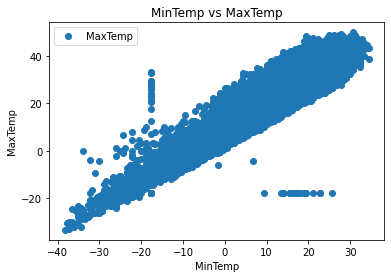

In [10]:
dataset.plot(x='MinTemp', y='MaxTemp', style='o')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()

In [12]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.displot(dataset['MaxTemp'])


<Figure size 1080x720 with 0 Axes>

In [13]:
X = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

In [16]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[10.66185201]
[[0.92033997]]


In [17]:
y_pred = regressor.predict(X_test)

In [19]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

Actual  Predicted
0      28.888889  33.670351
1      31.111111  30.091251
2      27.222222  26.512151
3      28.888889  31.113851
4      23.333333  15.774852
...          ...        ...
23803  32.777778  32.136451
23804  32.222222  29.068651
23805  31.111111  32.647751
23806  31.111111  30.602551
23807  36.666667  31.625151

[23808 rows x 2 columns]

In [20]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

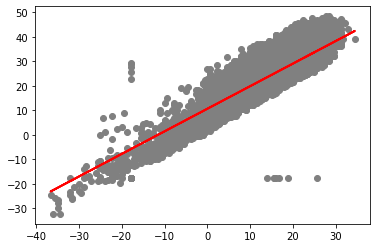

In [21]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [22]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.1993291783785285
Mean Squared Error: 17.631568097568444
Root Mean Squared Error: 4.198996082109204
